Olá, Gabriel!

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

# Descrição do Projeto

A empresa Sweet Lift Taxi coletou dados históricos sobre pedidos de táxi nos aeroportos. Para atrair mais motoristas durante o horário de pico, precisamos prever a quantidade de pedidos de táxi para a próxima hora. 	
Construa um modelo para tal predição.

A métrica REQM no conjunto de teste não deve ser superior a 48.

## Instruções do projeto

1. Faça download dos dados e faça uma nova amostragem em uma hora.
2. Analise os dados
3. Treine diferentes modelos com diferentes hiperparâmetros. A amostra de teste deve ser 10% do conjunto de dados inicial.
4. Teste os dados usando a amostra de teste e forneça uma conclusão.

## Descrição dos dados

Os dados são armazenados no arquivo `taxi.csv`. O número de pedidos está na coluna `num_orders`.

## Preparação 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/datasets/taxi.csv',index_col=[0], parse_dates=[0])

In [3]:
df.info()
print()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB



,num_orders
datetime,
2018-04-13 07:50:00,10
2018-03-25 10:30:00,7
2018-06-09 13:20:00,11
2018-06-12 20:00:00,16
2018-05-04 18:00:00,5
2018-04-11 03:20:00,12
2018-07-19 19:50:00,11
2018-05-05 21:20:00,15
2018-04-30 21:20:00,15


In [4]:
df.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


In [5]:
# Verificar Valores Ausentes
df.isna().sum()

num_orders    0
dtype: int64

In [6]:
df.sort_index(inplace=True)

In [7]:
# Realizando uma nova amostragem com uma hora de diferença.
df = df.resample('1H').sum()

Podemos ver que não valores ausentes e está tudo correto com nossa base de bados.

## Análise

In [8]:
df

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


In [9]:
import matplotlib.pyplot as plt

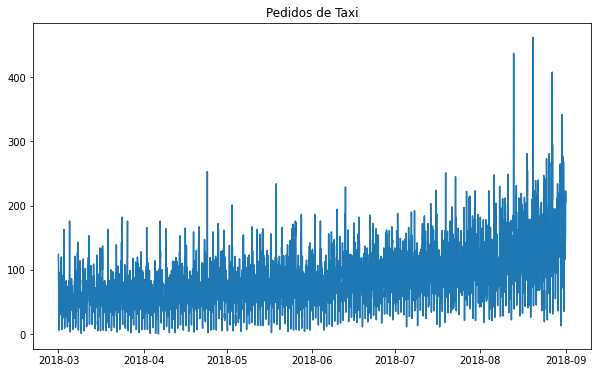

In [10]:
plt.figure(figsize=(10,6))
plt.title('Pedidos de Taxi')
plt.plot(df);
plt.show();

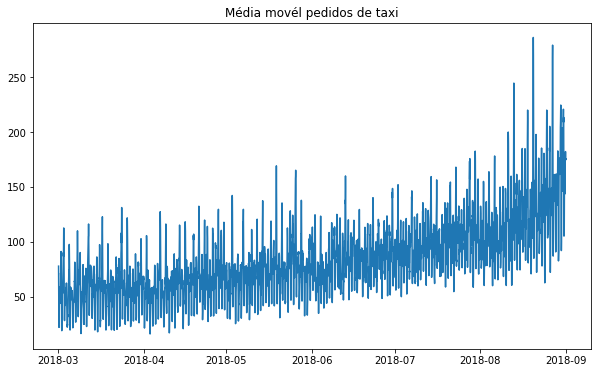

In [11]:
plt.figure(figsize=(10,6))
plt.title('Média movél pedidos de taxi')
plt.plot(df.rolling(5).mean()); 

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
decomposed = seasonal_decompose(df)

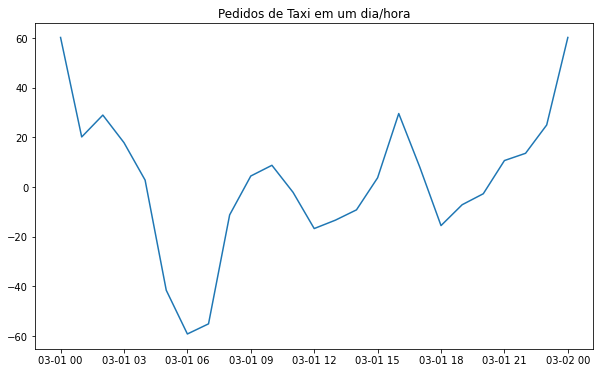

In [14]:
plt.figure(figsize=(10,6))
plt.plot(decomposed.seasonal['2018-03-01 00:00:00':'2018-03-02 00:00:00']);
plt.title('Pedidos de Taxi em um dia/hora');

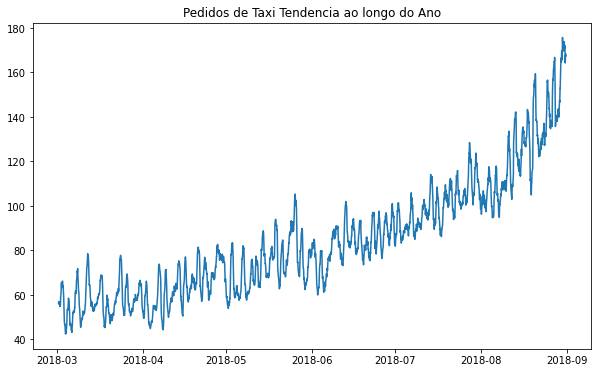

In [15]:
plt.figure(figsize=(10,6))
plt.plot(decomposed.trend['2018-03-01':'2018-08-31']);
plt.title('Pedidos de Taxi Tendencia ao longo do Ano');

In [16]:
# Ao começo parece ser uma série temporal é estacionária 
# Porém há uma tendência quando se chega mais perto do fim de ano e uma sazonalidade quando mais está perto de encerrar o dia.

Dados pré processados podemos ir para criação do nosso modelo.

## Treinamento

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import math

In [18]:
train, test = train_test_split(df, shuffle=False, test_size=0.1)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto! usou shuffle=False
</div>

In [19]:
print('Quantidade de pedidos de táxi mediano:', test['num_orders'].mean())

pred_previous = test.shift()
pred_previous.iloc[0] = train.iloc[-1]
print('REQM:', math.sqrt(mse(test, pred_previous)))

Quantidade de pedidos de táxi mediano: 139.55656108597285
REQM: 58.856486242815066


In [20]:
def make_features(df, max_lag, rolling_mean_size):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = (
    df['num_orders'].shift().rolling(rolling_mean_size).mean())

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto! Usou lag features
</div>

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
make_features(df, 6, 10)

train, test = train_test_split(df, shuffle=False, test_size=0.2)
train = train.dropna()

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

In [23]:
lr = LinearRegression()
lr.fit(features_train, target_train)

pred_train_lr = lr.predict(features_train)

print(
    'REQM para o conjunto de treinamento:',  math.sqrt(mse(target_train, pred_train_lr, squared=False)))


REQM para o conjunto de treinamento: 5.389391431066608


In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
# Modelagem da Floresta Aleatória buscando o melhor hiperparâmetro.
for depth in range(1,10):
    model_rfrg = RandomForestRegressor(random_state=5432, max_depth=depth)
    model_rfrg.fit(features_train, target_train)
    predictions_rfrg = model_rfrg.predict(features_test)
    print('max_depth =', depth, ': ', end='')
    print(math.sqrt(mse(target_test, predictions_rfrg, squared=False)))

max_depth = 1 : 8.13428529671211
max_depth = 2 : 7.820186196179366
max_depth = 3 : 7.669812068753307
max_depth = 4 : 7.573314232049555
max_depth = 5 : 7.418678006887044
max_depth = 6 : 7.355831055176905
max_depth = 7 : 7.344022502904266
max_depth = 8 : 7.363271919844538
max_depth = 9 : 7.357866139635145


In [26]:
# Modelagem da Floresta Aleatória buscando o melhor hiperparâmetro.
best_score = 0
best_est = 0
for est in range(1, 11):
    model_rfrg = RandomForestRegressor(random_state=5432,max_depth=8, n_estimators=est)
    model_rfrg.fit(features_train, target_train)
    predictions_rfrg = model_rfrg.predict(features_test)
    score = math.sqrt(mse(target_test, predictions_rfrg, squared=False))
    if score > best_score:
        best_score = score
        best_est = est

print("A REQM do melhor modelo no conjunto de validação (n_estimators = {}): {}".format(best_est, best_score))

A REQM do melhor modelo no conjunto de validação (n_estimators = 1): 7.978521587128858


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

o ideal é  usar loops encadeados para testar todas as combinações
</div>

## Testando

In [27]:
#Resultado REQM conjunto de teste em Regressão Linear
pred_test_lr = lr.predict(features_test)
print('REQM para o conjunto de teste em Regressão Linear:',  math.sqrt(mse(target_test, pred_test_lr, squared=False)))

REQM para o conjunto de teste em Regressão Linear: 6.9274518962434515


In [28]:
#Resultado REQM conjunto de teste em Floresta Aleatória
model = RandomForestRegressor(random_state=5432,max_depth=7, n_estimators=1)
model.fit(features_train, target_train)
pred_test_rfrg = model.predict(features_test)
print('REQM para o conjunto de teste em Floresta Aleatória:',  math.sqrt(mse(target_test, pred_test_rfrg, squared=False)))

REQM para o conjunto de teste em Floresta Aleatória: 7.768667789965141


## Conclusão

Neste projeto, importamos bibliotecas como "pandas" e "numpy" que habitualmente já utilizamos e sklearn para criação do nosso modelo.
Realizamos o pre-processamento, para que não tivesse acontecido algum problema na criação do nosso modelo. O modelo com melhor pontuação no **REQM** foi o Modelo Regressão Linear, abaixo de 48 conforme que foi pedido.

# Revisão da checklist

- [x]  O Jupyter Notebook está aberto.

- [ ]  O código está livre de erros
- [ ]  As células com o código foram organizadas em ordem de execução.
- [ ]  Os dados foram baixados e preparados

- [ ]  Os dados foram analisados
- [ ]  O modelo foi treinado e os hiperparâmetros foram selecionados
- [ ]  	
O modelo foi avaliado. Uma conclusão foi fornecida

- [ ] 
O REQM para o conjunto de teste não é maior que 48


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho. No geral, você respondeu corretamente as questões.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente
- Criou features
- Calibrou hiperparâmetros

    
<span class="text-danger">
Confesso ter sentido falta de uma análise exploratória dos dados. Por conta disso, vamos fazer mais uma rodada. Peço que implemente:
- Plotar a série
- Decompor a série e plotar as decomposições seasonal_decompose
- Plote o resultado de rolling(5).mean(). Busque para serve .rolling()
Acredito que são aprendizados importantes para trabalhar com séries temporais
</span>

Portanto, sugiro que você corrija os pontos indicados.
    
Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas comigo usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.
</div>


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>
Você finalizou mais um projeto. Comemore. Espero que você tenha copreendido como analisar e plotar uma série temporal.
</div>